In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
#installs conda in colab

In [ ]:
%%capture
!conda config --add channels http://conda.anaconda.org/psi4
!mamba install psi4 resp -c conda-forge/label/libint_dev -c conda-forge
!conda install dftd3-python -c conda-forge
!conda install gcp-correction -c conda-forge
!conda update -n base -c conda-forge conda
!pip install --upgrade pytest-dependency
!pip install --upgrade pluggy
#establishes the conda environment in Colab only

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
import psi4
import numpy as np
import matplotlib.pyplot as plt
#imports changed to accomodate plotting cell at the end

In [ ]:
psi4.set_memory('48 gb')
#to use an L4 High RAM core

intermetallicd = 2.10
metalhalogen = 2.10

intermbond = intermetallicd / (2**0.5)
n_intermbond = (-1) * intermbond
axialhalogen = intermbond + metalhalogen
n_axialhalogen = (-1) * axialhalogen
bridgeF = 0.5 * intermbond + (metalhalogen / (2**0.5))
n_bridgeF = (-1) * bridgeF

mol = psi4.geometry("""
-3 2
Nb {0} 0.0 0.0
Nb 0.0 {0} 0.0
Nb 0.0 0.0 {0}
Nb {1} 0.0 0.0
Nb 0.0 {1} 0.0
Nb 0.0 0.0 {1}
F {4} {4} 0.0
F {4} 0.0 {4}
F 0.0 {4} {4}
F {5} {5} 0.0
F {5} 0.0 {5}
F 0.0 {5} {5}
F {4} {5} 0.0
F {5} {4} 0.0
F {5} 0.0 {4}
F {4} 0.0 {5}
F 0.0 {5} {4}
F 0.0 {4} {5}
F {2} 0.0 0.0
F 0.0 {2} 0.0
F 0.0 0.0 {2}
F {3} 0.0 0.0
F 0.0 {3} 0.0
F 0.0 0.0 {3}

units angstrom
symmetry c1
""".format(intermbond,n_intermbond,axialhalogen,n_axialhalogen,bridgeF,n_bridgeF)
)

psi4.set_options({'reference': 'uks'})
d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
print(d_energy)

#Unit Cell Visualization
This is the visualizer portion of the code to aid in seeing fluorine placement in the unit cell. I've published this ipynb so anybody can see it without running the code and to see how I segmented the code blocks.

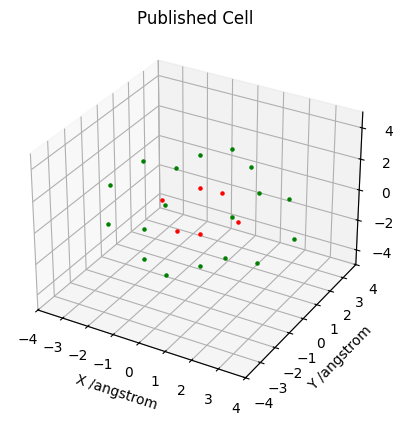

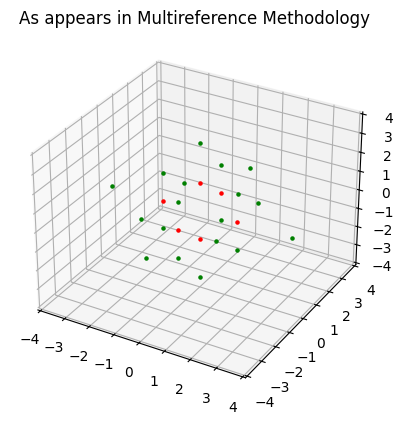

In [2]:
intermetallicd = 2.10
metalhalogen = 2.10

intermbond = intermetallicd / (2**0.5)
n_intermbond = (-1) * intermbond
axialhalogen = intermbond + metalhalogen
n_axialhalogen = (-1) * axialhalogen
bridgeF = 0.5 * intermbond + (metalhalogen / (2**0.5))
n_bridgeF = (-1) * bridgeF

published_cell = np.array([
[intermbond, 0.0, 0.0],
[0.0, intermbond, 0.0],
[0.0, 0.0, intermbond],
[n_intermbond, 0.0, 0.0],
[0.0, n_intermbond, 0.0],
[0.0, 0.0, n_intermbond],
[bridgeF, bridgeF, 0.0],
[bridgeF, 0.0, bridgeF],
[0.0, bridgeF, bridgeF],
[n_bridgeF, n_bridgeF, 0.0],
[n_bridgeF, 0.0, n_bridgeF],
[0.0, n_bridgeF, n_bridgeF],
[bridgeF, n_bridgeF, 0.0],
[n_bridgeF, bridgeF, 0.0],
[n_bridgeF, 0.0, bridgeF],
[bridgeF, 0.0, n_bridgeF],
[0.0, n_bridgeF, bridgeF],
[0.0, bridgeF, n_bridgeF],
[axialhalogen, 0.0, 0.0],
[0.0, axialhalogen, 0.0],
[0.0, 0.0, axialhalogen],
[n_axialhalogen, 0.0, 0.0],
[0.0, n_axialhalogen, 0.0],
[0.0, 0.0, n_axialhalogen]])

knoll_cell = np.array([
[intermbond, 0.0, 0.0],
[0.0, intermbond, 0.0],
[0.0, 0.0, intermbond],
[n_intermbond, 0.0, 0.0],
[0.0, n_intermbond, 0.0],
[0.0, 0.0, n_intermbond],
[intermbond, intermbond, 0.0],
[intermbond, 0.0, intermbond],
[0.0, intermbond, intermbond],
[n_intermbond, n_intermbond, 0.0],
[n_intermbond, 0.0, n_intermbond],
[0.0, n_intermbond, n_intermbond],
[intermbond, n_intermbond, 0.0],
[n_intermbond, intermbond, 0.0],
[n_intermbond, 0.0, intermbond],
[intermbond, 0.0, n_intermbond],
[0.0, n_intermbond, intermbond],
[0.0, intermbond, n_intermbond],
[axialhalogen, 0.0, 0.0],
[0.0, axialhalogen, 0.0],
[0.0, 0.0, axialhalogen],
[n_axialhalogen, 0.0, 0.0],
[0.0, n_axialhalogen, 0.0],
[0.0, 0.0, n_axialhalogen]])

pub_fig = plt.figure()
ax1 = pub_fig.add_subplot(projection='3d')

for i in np.arange(0,24):
  if i <= 5:
    x = published_cell[i,0]
    y = published_cell[i,1]
    z = published_cell[i,2]
    ax1.scatter(x,y,z, c = 'r', marker= '.')
  else:
    x = published_cell[i,0]
    y = published_cell[i,1]
    z = published_cell[i,2]
    ax1.scatter(x,y,z, c = 'g', marker= '.')
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.set_zlim(-5, 5)
ax1.set_xlabel('X /angstrom')
ax1.set_ylabel('Y /angstrom')
ax1.set_zlabel('Z /angstrom')

plt.title('Published Cell')
plt.show()

knoll = plt.figure()
ax2 = knoll.add_subplot(projection='3d')

for i in np.arange(24):
  if i <= 5:
    x = knoll_cell[i,0]
    y = knoll_cell[i,1]
    z = knoll_cell[i,2]
    ax2.scatter(x,y,z, c = 'r', marker= '.')
  else:
    x = knoll_cell[i,0]
    y = knoll_cell[i,1]
    z = knoll_cell[i,2]
    ax2.scatter(x,y,z, c = 'g', marker= '.')
ax1.set_xlabel('X /angstrom')
ax1.set_ylabel('Y /angstrom')
ax1.set_zlabel('Z /angstrom')

plt.title('As appears in Multireference Methodology')

plt.show()